# YouTube_Data_Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format) # Changes the format into float with 2 decimal points

In [2]:
#Supress the Warnings 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Import the dataset
#encoding='unicode_escape used to handle special characters, escape sequences, or non-ASCII text by interpreting escape sequences like \n, \t, \u1234, and others directly in the string. 

df = pd.read_csv('Global YouTube Statistics.csv',encoding='unicode_escape')

# Explore the data

In [4]:
# view the first 5 rows
pd.set_option('display.max_columns',None)
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.00,228000000000.00,Music,T-Series,20082,India,india,IN,Music,1.00,1.00,1.00,2258000000.00,564600.00,9000000.00,6800000.00,108400000.00,2000000.00,2006.00,Mar,13.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
1,2,YouTube Movies,170000000.00,0.00,Film & Animation,youtubemovies,1,United States,United States,US,Games,4055159.00,7670.00,7423.00,12.00,0.00,0.05,0.04,0.58,NaN,2006.00,NaN,5.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
2,3,MrBeast,166000000.00,28368841870.00,Entertainment,MrBeast,741,United States,United States,US,Entertainment,48.00,1.00,1.00,1348000000.00,337000.00,5400000.00,4000000.00,64700000.00,8000000.00,2012.00,Feb,20.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,162000000.00,164000000000.00,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,Education,2.00,2.00,1.00,1975000000.00,493800.00,7900000.00,5900000.00,94800000.00,1000000.00,2006.00,Sep,1.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
4,5,SET India,159000000.00,148000000000.00,Shows,SET India,116536,India,India,IN,Entertainment,3.00,2.00,2.00,1824000000.00,455900.00,7300000.00,5500000.00,87500000.00,1000000.00,2006.00,Sep,20.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96


In [5]:
# shape of the data set
df.shape

(1006, 29)

In [6]:
# Check the structure and types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [7]:
# Summarize numerical columns
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,1006.00,1003.00,1006.00,1006.00,1005.00,887.00,971.00,949.00,1006.00,1006.00,1006.00,1006.00,666.00,1001.00,1001.00,880.00,880.00,880.00,880.00,880.00,880.00
mean,497.47,23195014.96,11124109791.84,9168.34,560766.97,384.29,742.31,176097833.97,37034.35,592245.27,443987.11,7110326.84,349541.85,2012.61,15.71,63.60,430458622.95,9.26,223974718.82,26.64,-13.81
std,288.74,17830466.18,14241483441.42,34028.19,1368885.73,1227.36,1938.13,415293308.26,71869.65,1148966.54,861194.22,13799208.00,613155.38,4.51,8.77,26.10,473553578.13,4.89,155038054.75,20.52,84.73
min,1.00,12300000.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1970.00,1.00,7.60,202506.00,0.75,35588.00,-38.42,-172.10
25%,247.25,14500000.00,4281427310.00,194.00,322.00,11.00,26.00,19740000.00,2700.00,43400.00,32525.00,520750.00,100000.00,2009.00,8.00,36.30,83132799.00,5.27,55908316.00,20.59,-95.71
50%,498.50,17700000.00,7751292167.50,726.50,919.00,50.00,65.00,64085000.00,13250.00,211700.00,158750.00,2550000.00,200000.00,2013.00,16.00,68.00,328239523.00,8.88,270663028.00,37.09,-51.93
75%,748.75,24750000.00,13573570516.75,2606.50,3645.00,123.00,139.00,169242000.00,38125.00,610175.00,457650.00,7300000.00,400000.00,2016.00,23.00,88.20,328239523.00,14.70,270663028.00,37.09,78.96
max,995.00,245000000.00,228000000000.00,301308.00,4057944.00,7741.00,7741.00,6589000000.00,850900.00,13600000.00,10200000.00,163400000.00,8000000.00,2022.00,31.00,113.10,1397715000.00,14.72,842933962.00,61.92,138.25


# Data Cleaning

In [8]:
#check the null values 
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

In [9]:
# Optimizing data by dropping unnecessary columns to reduce memory usage and improve loading speed

Unnecessary_columns =  [ 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude', 'Country','Abbreviation']
df.drop(Unnecessary_columns, axis=1, inplace = True)

In [10]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date
0,1,T-Series,245000000.00,228000000000.00,Music,T-Series,20082,India,Music,1.00,1.00,1.00,2258000000.00,564600.00,9000000.00,6800000.00,108400000.00,2000000.00,2006.00,Mar,13.00
1,2,YouTube Movies,170000000.00,0.00,Film & Animation,youtubemovies,1,United States,Games,4055159.00,7670.00,7423.00,12.00,0.00,0.05,0.04,0.58,NaN,2006.00,NaN,5.00
2,3,MrBeast,166000000.00,28368841870.00,Entertainment,MrBeast,741,United States,Entertainment,48.00,1.00,1.00,1348000000.00,337000.00,5400000.00,4000000.00,64700000.00,8000000.00,2012.00,Feb,20.00
3,4,Cocomelon - Nursery Rhymes,162000000.00,164000000000.00,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.00,2.00,1.00,1975000000.00,493800.00,7900000.00,5900000.00,94800000.00,1000000.00,2006.00,Sep,1.00
4,5,SET India,159000000.00,148000000000.00,Shows,SET India,116536,India,Entertainment,3.00,2.00,2.00,1824000000.00,455900.00,7300000.00,5500000.00,87500000.00,1000000.00,2006.00,Sep,20.00


In [11]:
#Fill the null values 
df['subscribers'].fillna(0, inplace= True)
df['category'].fillna('nan', inplace= True)
df['Country of origin'].fillna('Unknown', inplace = True)
df['channel_type'].fillna('NAN', inplace= True)
df['video_views_rank'].fillna(0, inplace= True)
df['country_rank'].fillna(0, inplace = True)
df['channel_type_rank'].fillna(0, inplace = True)
df['video_views_for_the_last_30_days'].fillna(0, inplace = True)
df['subscribers_for_last_30_days'].fillna(0, inplace = True)
df['created_year'].fillna(0, inplace = True)
df['created_date'].fillna(0, inplace = True)
df['created_month'].fillna(0, inplace = True)

In [12]:
#Correct the data types using loop
for i in ['subscribers',  'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days','subscribers_for_last_30_days','created_year','created_date'] :
   df[i] =  df[i].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              1006 non-null   int64  
 1   Youtuber                          1006 non-null   object 
 2   subscribers                       1006 non-null   int32  
 3   video views                       1006 non-null   float64
 4   category                          1006 non-null   object 
 5   Title                             1006 non-null   object 
 6   uploads                           1006 non-null   int64  
 7   Country of origin                 1006 non-null   object 
 8   channel_type                      1006 non-null   object 
 9   video_views_rank                  1006 non-null   int32  
 10  country_rank                      1006 non-null   int32  
 11  channel_type_rank                 1006 non-null   int32  
 12  video_

In [14]:
# Fill missing values in text columns with the mode (most frequent value)
x = df['created_month'].mode()
df['created_month'].replace(0,x[0], inplace= True)

In [15]:
# Convert months(text) to Month(number)
month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['created_month'] = df['created_month'].astype(str)
df['created_month'] = df['created_month'].replace(month_to_number)

df['created_month'] = df['created_month'].astype(int)

In [16]:
# Fill missing values in numeric columns with the median (middle value)
df["created_year"].replace(0,df["created_year"].median(), inplace=True)
df["created_date"].replace(0,df["created_date"].median(), inplace = True)

# Data Transformation

In [17]:
# Create new column by merging existing columns 
df["Date"] = pd.to_datetime(df["created_year"].astype(str) + '/' + df["created_month"].astype(str) + '/' +df["created_date"].astype(str) )

# Top 10 Countries by Views

In [18]:
df['Country of origin'].value_counts().head(10)

Country of origin
United States     315
India             170
Unknown           125
Brazil             62
United Kingdom     44
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Name: count, dtype: int64

In [19]:
# Top 10 Youtubers by views 
top_10_youtubers = df.groupby('Youtuber')['video views'].sum().reset_index()
top_10_youtubers = top_10_youtubers.sort_values(by='video views', ascending=False).head(10)
top_10_youtubers

,Youtuber,video views
737,T-Series,228000000000.00
154,Cocomelon - Nursery Rhymes,164000000000.00
859,WWE,154856947324.00
671,SET India,148000000000.00
716,Sony SAB,101000000000.00
963,ýýý Kids Diana Show,93247040539.00
450,Like Nastya,90479060027.00
843,Vlad and Niki,77180169894.00
905,Zee TV,73139054467.00
476,LooLoo Kids - Nursery Rhymes and Children's Songs,64624862478.00


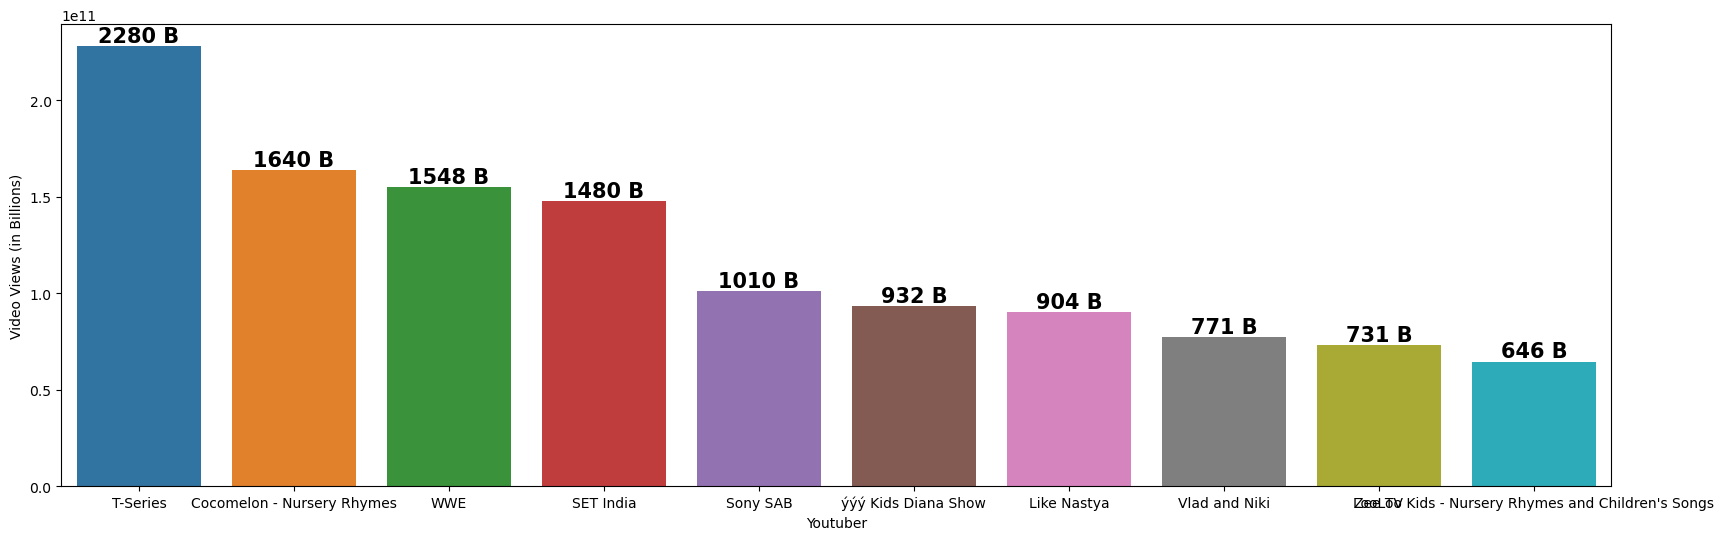

In [20]:
plt.figure(figsize=(20,6))


# Create the bar plot
ax = sns.barplot(x=top_10_youtubers['Youtuber'], y=top_10_youtubers['video views'])

# Add labels on top of the bars, convert values to millions
vl =  (top_10_youtubers['video views'] / 1e8).astype(int)
vl = vl.astype(str) + ' B'

ax.bar_label(ax.containers[0], labels = vl ,fontsize=15, fontweight='bold')

#ax.bar_label(ax.containers[0], labels=[f'{int(view/1e8)}B' for view in top_10_countries['video views']], fontsize=15, fontweight='bold')

plt.xlabel("Youtuber")
plt.ylabel("Video Views (in Billions)")
plt.show()

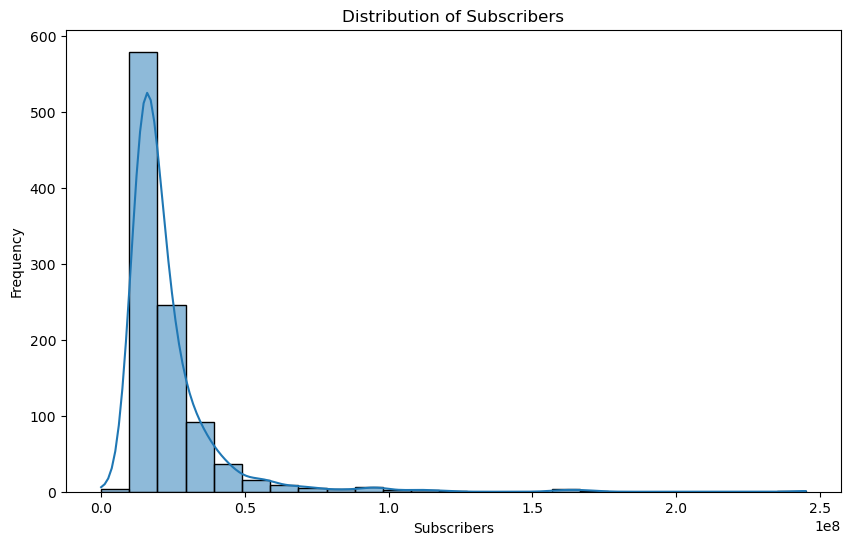

In [21]:
#histogram for distribution of subscribers
#coloumn(subscribers)
plt.figure(figsize=(10,6))
sns.histplot(df['subscribers'], bins=25, kde=True) #kde= added smoth line across the graph
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

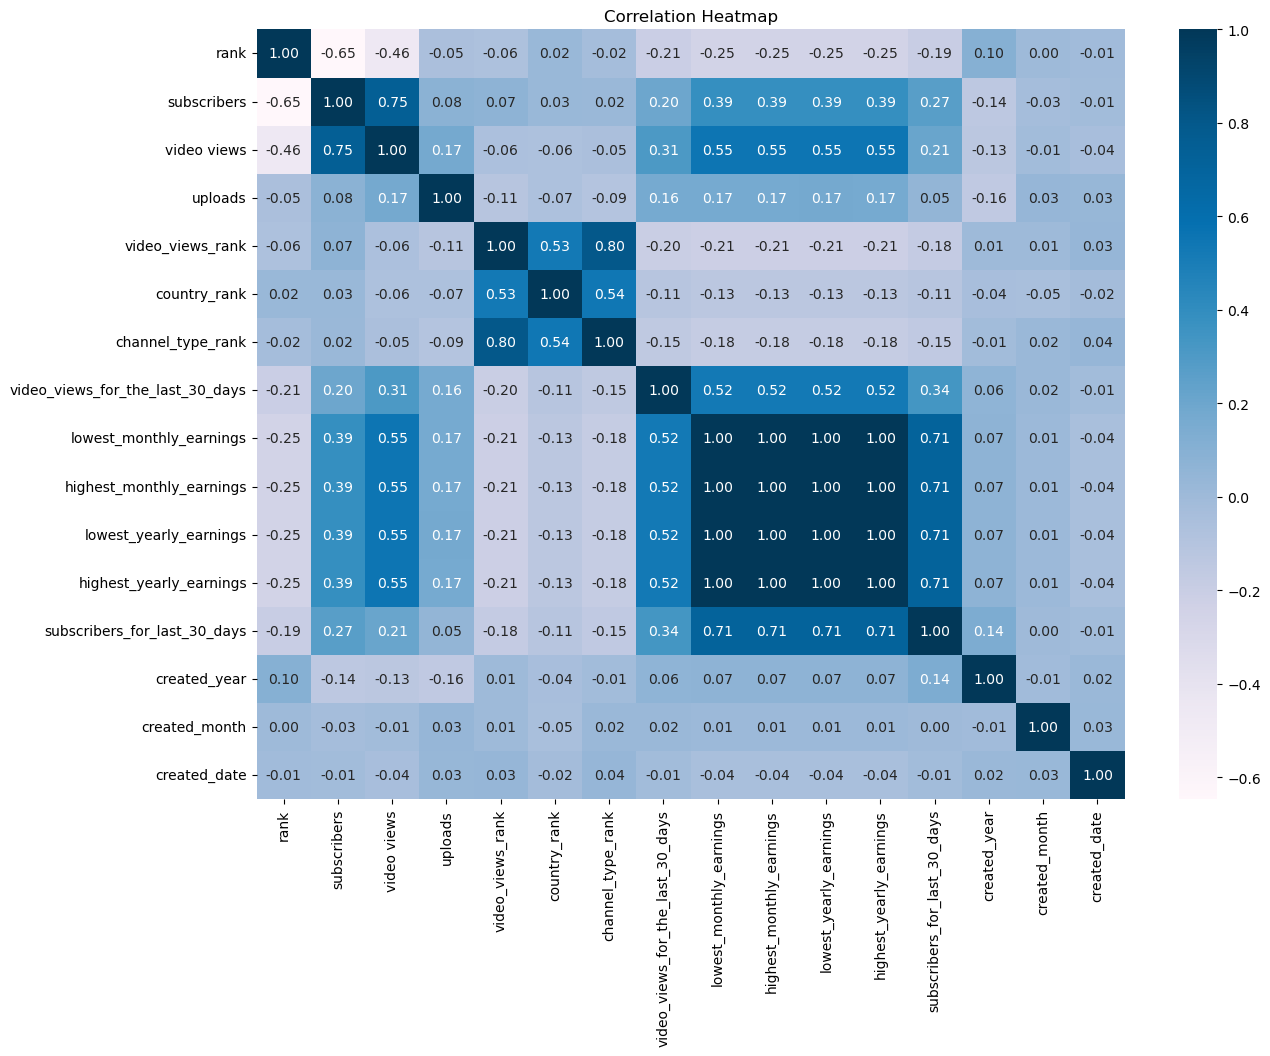

In [22]:
#Correaltion Heatmap (Help us to understand Correaltion between data points) 
# Heatmap works on numeric columns 
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PuBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
#Top 10 channels by Views in last 30 days
data = df[['Youtuber', 'video_views_for_the_last_30_days']].sort_values('video_views_for_the_last_30_days' , ascending = False).head(10)

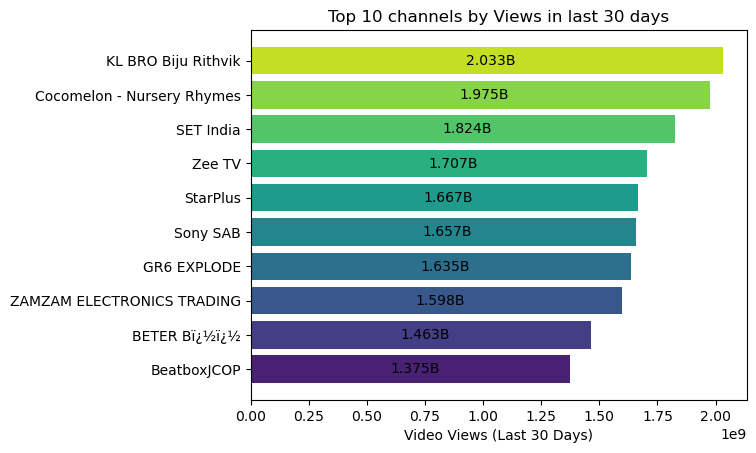

In [24]:
sorted_data = data.sort_values(by='video_views_for_the_last_30_days', ascending=True)
colors = sns.color_palette('viridis', len(sorted_data))

plt.barh(sorted_data['Youtuber'], sorted_data['video_views_for_the_last_30_days'] , color = colors)
plt.title('Top 10 channels by Views in last 30 days')
plt.xlabel('Video Views (Last 30 Days)')

video_view_30 = (sorted_data['video_views_for_the_last_30_days'] / 1e9 ).astype(str) + 'B'



#def billion_formatter(video_view_30, _):
 #   return f'{video_view_30 / 1e9:.1f}B'  # Divide by 1e9 to convert to billions and format with 1 decimal

# Add labels with the custom billion formatter
#plt.bar_label(plt.gca().containers[0], labels=[billion_formatter(val, None) for val in video_view_30], padding=3 , label_type = 'center' )

plt.bar_label(plt.gca().containers[0], labels= video_view_30, padding=3 , label_type = 'center' )

#plt.bar_label(plt.gca().containers[0], label_type = 'center', fmt = '1e8.2fB')
plt.show()

In [25]:
#Top 10 channels by subscriber in last 30 days
data = df[['Youtuber', 'subscribers_for_last_30_days']].sort_values('subscribers_for_last_30_days' , ascending = False).head(10)

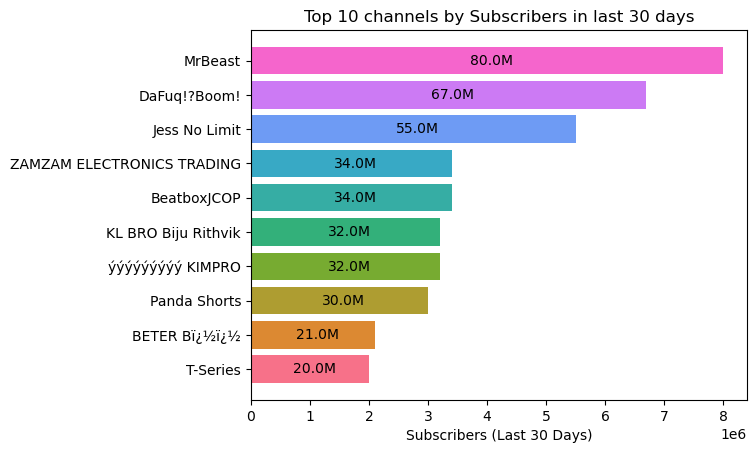

In [26]:
sorted_data = data.sort_values(by='subscribers_for_last_30_days', ascending=True)
colors = sns.color_palette('husl', len(sorted_data))

plt.barh(sorted_data['Youtuber'], sorted_data['subscribers_for_last_30_days'] , color = colors)
plt.title('Top 10 channels by Subscribers in last 30 days')
plt.xlabel('Subscribers (Last 30 Days)')

video_view_30 = (sorted_data['subscribers_for_last_30_days'] / 1e5 ).astype(str) + 'M'

plt.bar_label(plt.gca().containers[0], labels= video_view_30, padding=3 , label_type = 'center' )
plt.show()

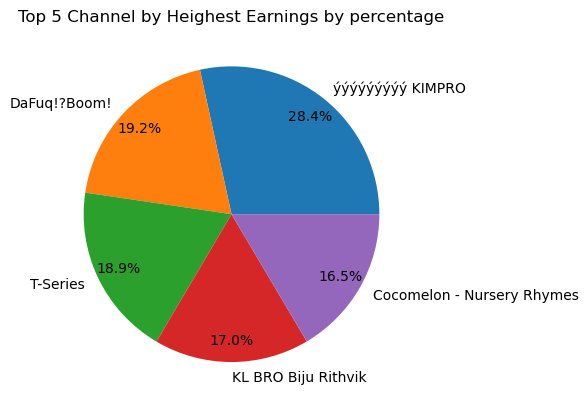

In [35]:
#Top 5 Channel by Heighest Earnings by percentage 
Top_5_Earning_channel = df[['Youtuber', 'highest_yearly_earnings']].sort_values('highest_yearly_earnings' , ascending = False).head(5)
plt.pie(Top_5_Earning_channel['highest_yearly_earnings'], labels=Top_5_Earning_channel['Youtuber'],
        autopct='%1.1f%%', pctdistance=0.85)
 
# draw circle
centre_circle = plt.Circle((0,0),0.0, fc='yellow')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Top 5 Channel by Heighest Earnings by percentage')
plt.show()

In [28]:
#total number of youtubers

df['Youtuber'].value_counts().sum()

1006

# Total income

In [29]:
df['Total Income'] = (df['highest_yearly_earnings']+ df['lowest_yearly_earnings'] ).sort_values(ascending = True)

#df['Total Income'] = (df['Total Income']/1e8).astype(str) + 'B'
df[['Youtuber', 'Total Income']]

,Youtuber,Total Income
0,T-Series,115200000.00
1,YouTube Movies,0.62
2,MrBeast,68700000.00
3,Cocomelon - Nursery Rhymes,100700000.00
4,SET India,93000000.00
...,...,...
1001,The Dodo,368.00
1002,Supercar Blondie,18100000.00
1003,Just For Laughs Gags,890900.00
1004,Kabita's Kitchen,2229400.00


# KDE Chart for income

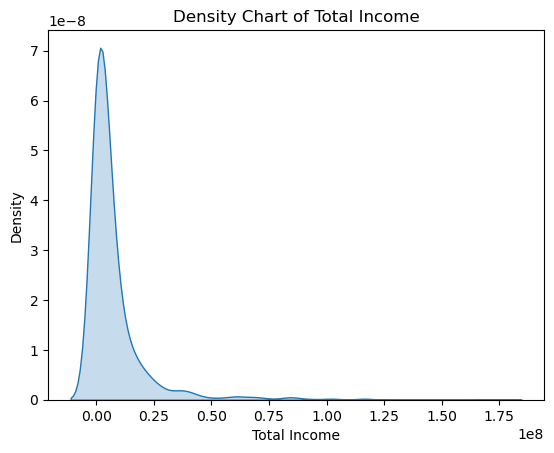

In [30]:
sns.kdeplot(df['Total Income'], shade=True )
plt.title('Density Chart of Total Income')
plt.show()